In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

In [16]:
df = pd.read_csv('./drive/My Drive/houses.csv')
df.head()

x_train = df.drop('Price(1000s dollars)', axis=1)
y_train = df['Price(1000s dollars)']

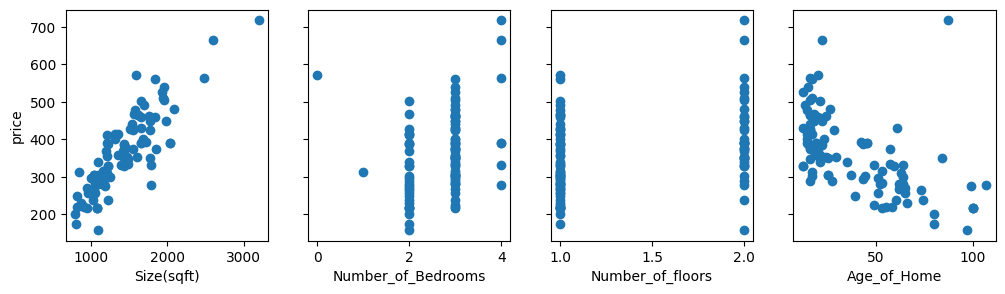

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x_train.iloc[:, i], y_train)
  ax[i].set_xlabel(x_train.columns[i])
ax[0].set_ylabel('price')
plt.show()

Key Observations from Scatter plots
- As Size(sqft) increases so does price
- Number of Bedrooms & Number of Floors do not affect the price, more or less
- As the Age of Home increases, price decreases -> Newer homes have higher price

In [30]:
# compute cost
def compute_cost(x,y,w,b):
    x = np.array(x)
    y = np.array(y)
    n = x.shape[0]
    cost = 0.0
    for i in range(n):
      fw_i = np.dot(w,x[i]) + b
      cost = (fw_i - y[i])**2
    cost = cost/(2*n)
    return cost

# compute gradient
def compute_gradient(x,y,w,b):
  x = np.array(x)
  y = np.array(y)
  n,m = x.shape
  dj_dw = np.zeros((m,))
  dj_db = 0.0

  for i in range(n):
    diff = np.dot(w,x[i]) + b - y[i]
    for j in range(m):
      dj_dw[j] = dj_dw[j] + diff*x[i][j]
    dj_db = dj_db + diff
  dj_dw = dj_dw/n
  dj_db = dj_db/n
  return dj_dw, dj_db

# gradient descent
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
  w = copy.deepcopy(w_in)
  b = b_in
  j_hist =[]

  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x,y,w,b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    if i<10000:
      j_hist.append(cost_function(x,y,w,b))
    if i%math.ceil(num_iters/10)==0:
      print(f"Iteration {i:4}: Cost {j_hist[-1]:0.2e}")
  return w, b, j_hist


In [42]:
w_init = np.zeros(x_train.shape[1])
b_init = 0
w_final, b_final, hist = gradient_descent(x_train, y_train,w_in=w_init,b_in=b_init, num_iters=10, alpha = 9.9e-7, cost_function=compute_cost, gradient_function=compute_gradient)

Iteration    0: Cost 4.92e+02
Iteration    1: Cost 5.86e+02
Iteration    2: Cost 8.43e+02
Iteration    3: Cost 1.03e+03
Iteration    4: Cost 1.45e+03
Iteration    5: Cost 1.81e+03
Iteration    6: Cost 2.50e+03
Iteration    7: Cost 3.16e+03
Iteration    8: Cost 4.32e+03
Iteration    9: Cost 5.51e+03


In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cost_i_w(X, y, hist, w=None, b=None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # --- Plot 1: Learning curve ---
    axs[0].plot(range(len(hist)), hist, 'b')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Cost')
    axs[0].set_title('Learning Curve (Cost vs Iterations)')

    # --- Plot 2: Cost vs w[0] ---
    if w is not None and b is not None:
        w0_values = np.linspace(w[0] - 50, w[0] + 50, 100)
        costs = []
        for w0 in w0_values:
            temp_w = w.copy()
            temp_w[0] = w0
            costs.append(compute_cost(X, y, temp_w, b))
        axs[1].plot(w0_values, costs, 'r')
        axs[1].set_xlabel('w[0]')
        axs[1].set_ylabel('Cost')
        axs[1].set_title('Cost vs w[0]')
    else:
        axs[1].text(0.5, 0.5, 'Pass w and b to plot Cost vs w[0]',
                    horizontalalignment='center', verticalalignment='center')

    plt.tight_layout()
    plt.show()


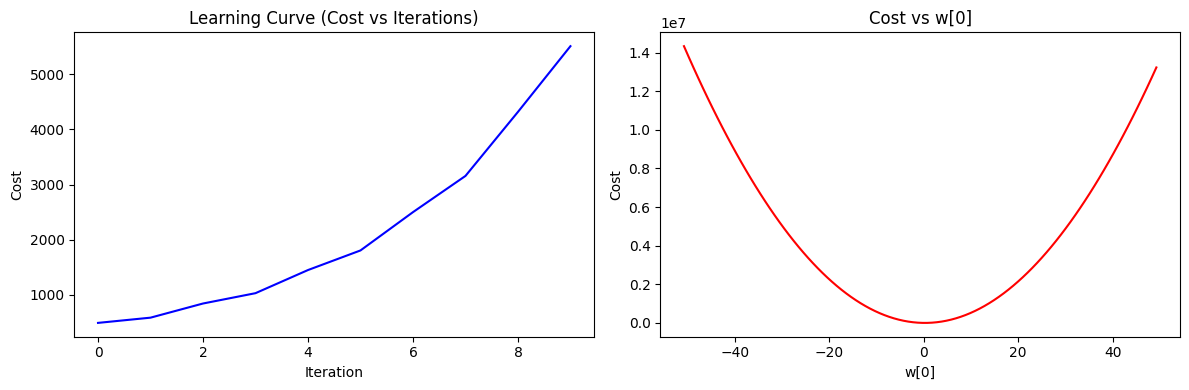

In [44]:

plot_cost_i_w(x_train, y_train, hist, w=w_final, b=b_final)

Iteration    0: Cost 3.42e+02
Iteration    1: Cost 2.72e+02
Iteration    2: Cost 2.84e+02
Iteration    3: Cost 2.23e+02
Iteration    4: Cost 2.35e+02
Iteration    5: Cost 1.82e+02
Iteration    6: Cost 1.95e+02
Iteration    7: Cost 1.49e+02
Iteration    8: Cost 1.62e+02
Iteration    9: Cost 1.22e+02


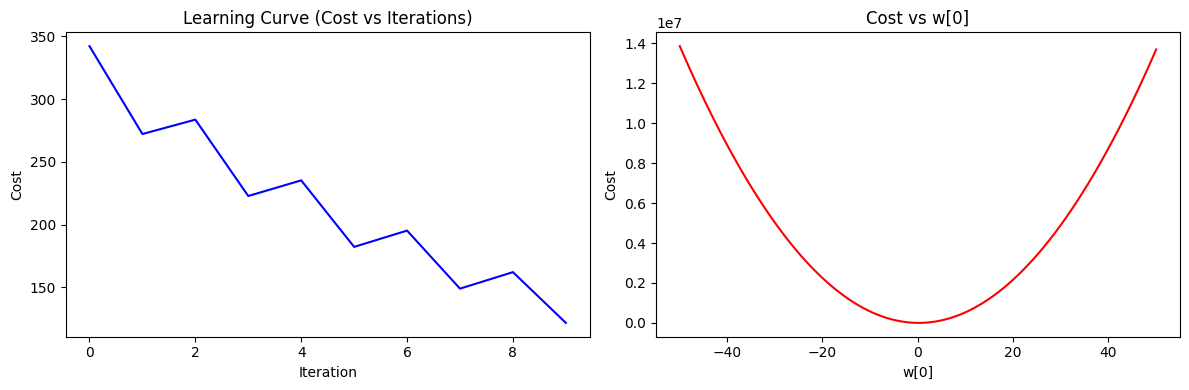

In [45]:
w_final, b_final, hist = gradient_descent(x_train, y_train,w_in=w_init,b_in=b_init, num_iters=10, alpha = 9e-7, cost_function=compute_cost, gradient_function=compute_gradient)
plot_cost_i_w(x_train, y_train, hist, w=w_final, b=b_final)